# K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. To illustrate this concept we will once again consider the penguin dataset.We pick the first 2 columns (bill length and bill depth) for visualization.

## 1. Data preprocessing

We first prerpocess the data to drop NAN, in case X matrix and y contain NAN

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Then we visulize the data before making the clustering

We first initialize the feature X matrix and the label y

In [25]:
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()


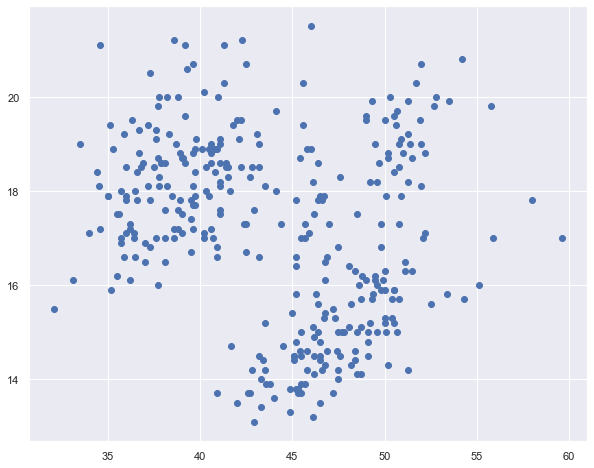

In [26]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

The plot above shows the points before clustering.

## 2. Build the Class

We want to make three clusters, so we first random three points as the centers.

In [27]:
centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

In [28]:
centers

[(39.5, 17.4, 0), (38.7, 19.0, 1), (42.0, 19.5, 2)]

we can view these three centers in the plot.

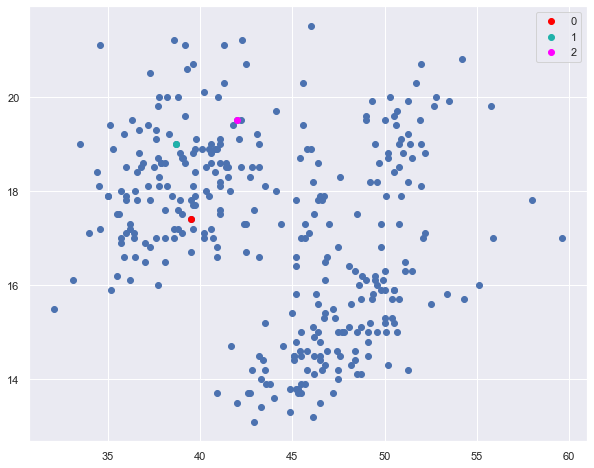

In [29]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.legend()
plt.show()


It does not look at good. The three centers are too close. But we can through iterations to adjust the position of centers gradually.

In [15]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [16]:
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [17]:
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

In [19]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    elif y == 2:
        return "magenta"
    else:
        return "blue"

c = [colors(label) for label in y]

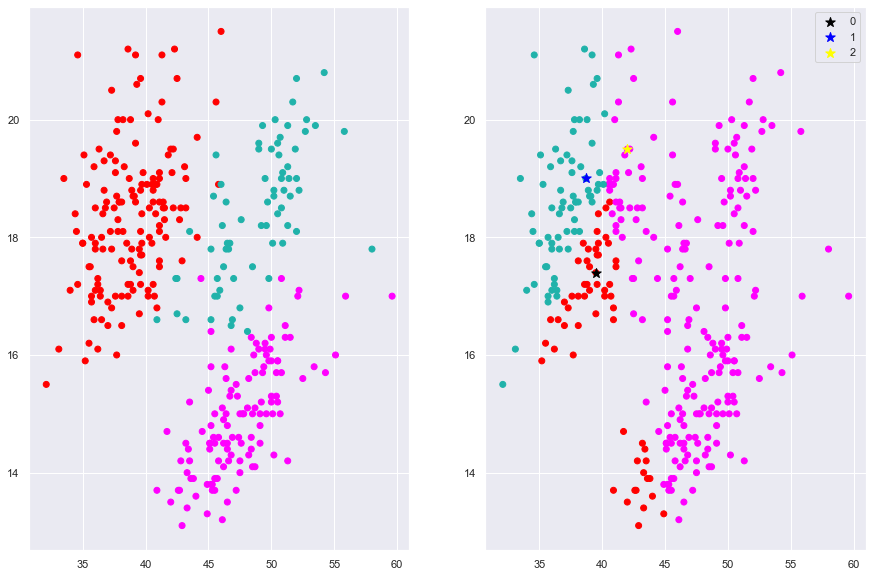

In [30]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "black", label = centers[0][2] , marker = '*',s=100)
ax2.scatter([centers[1][0]], [centers[1][1]], color = "blue", label = centers[1][2], marker = '*',s=100)
ax2.scatter([centers[2][0]], [centers[2][1]], color = "yellow", label = centers[2][2], marker = '*',s=100)

plt.legend()
plt.show()

As expected, the result of clustering is not good compared with the true classification. Next, we can expect the result after one update.


In [31]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

The new three centers become the mean of points which have been assigned to this clustering after the first clustering. 
The new centers may not be original sample.

In [32]:
new_centers = update_centers(X, centers)

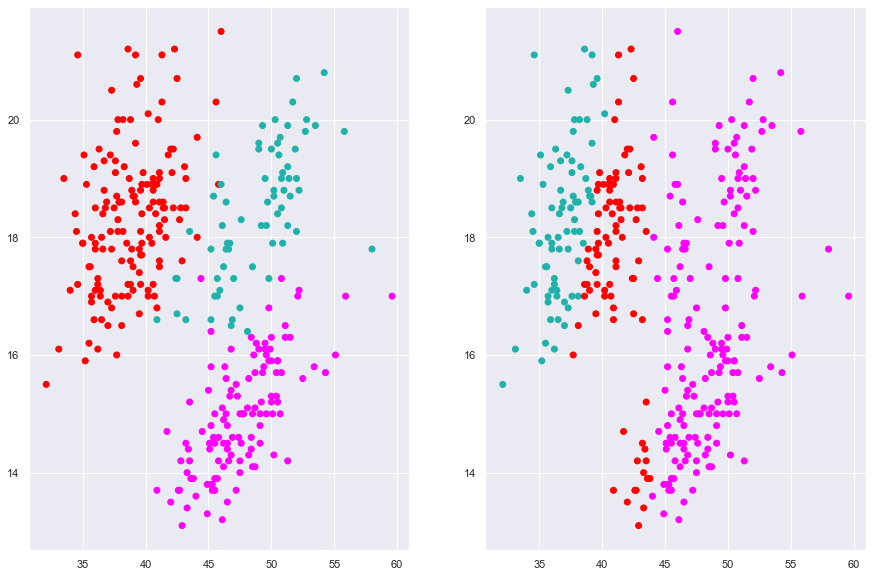

In [33]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

The new update still does not look good. next, we try 300 iterations.

In [38]:
def k_means_clustering(X, k, max_iter = 300):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers
    

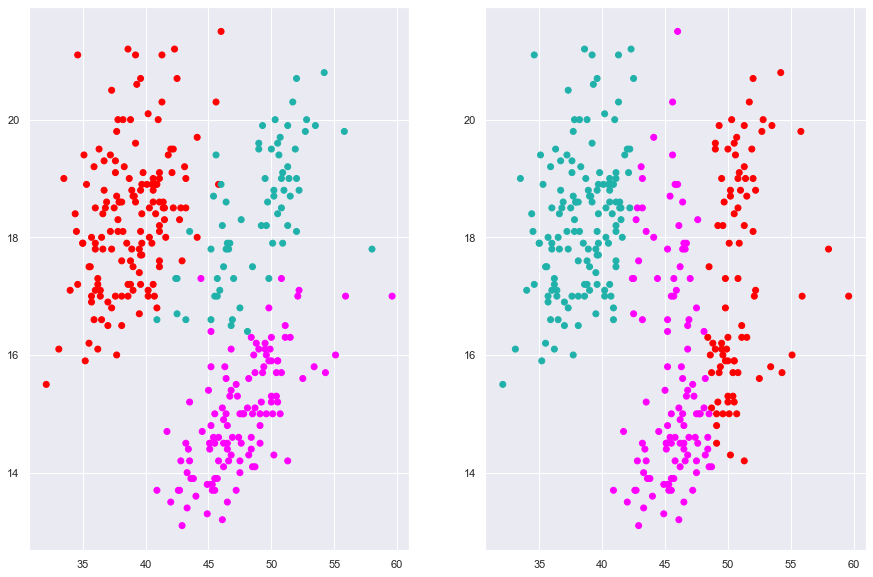

In [47]:
centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)


ax2.scatter(X[:, 0], X[:, 1], c = current_colors)


plt.show()


we can see that even through 300 iterations, the result still has some big difference compared with the true labeled y.
In this dataset, the data have been labeled. But, in the reality, we need use kmeans to address unlabeled data.

In this example, we can see that the one of disadvantages is that the clustering depends on the initial values in some certain degree.

## 3. Sklearn Package

In [49]:
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()


In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter= 300, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [51]:
sklabels = kmeans.labels_

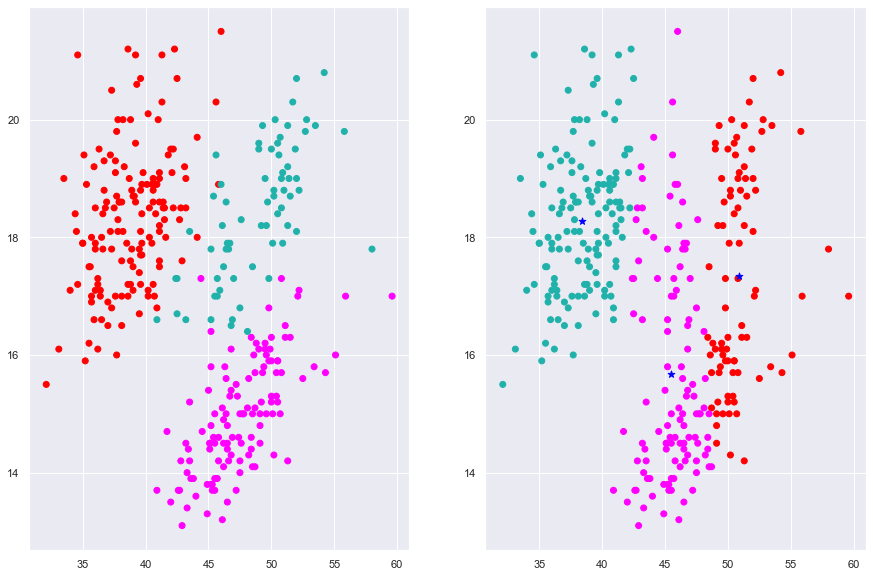

In [53]:
current_colors = [colors(label) for label in sklabels]
centers = kmeans.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

ax2.scatter([centers[0,0]],[centers[0,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[1,0]],[centers[1,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[2,0]],[centers[2,1]], color = "blue", marker = '*', s =50)
plt.show()

Using sklearn package, we get the same result. we can see that the upper left corner is classified correctly, but the two clusters in the lower right corner are mixed. The reason could be due to the wrong position of centers. we can try more iterations, like 1000 and 5000 and see the result.

when iteration is 1000

In [54]:
kmeans1 = KMeans(n_clusters=3, max_iter= 1000, random_state=0)

kmeans1.fit(X)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [55]:
sklabels = kmeans1.labels_

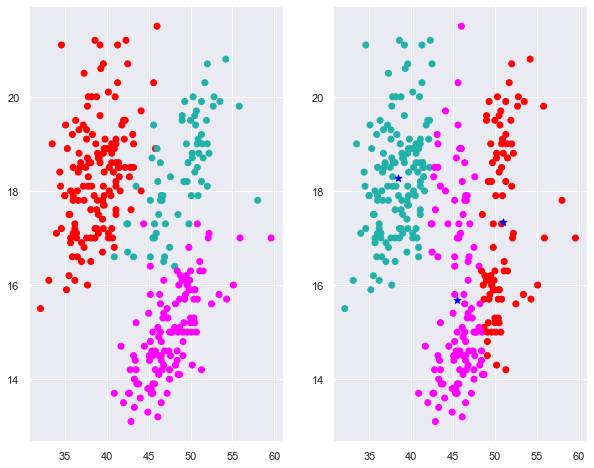

In [56]:
current_colors = [colors(label) for label in sklabels]
centers = kmeans1.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 8))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

ax2.scatter([centers[0,0]],[centers[0,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[1,0]],[centers[1,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[2,0]],[centers[2,1]], color = "blue", marker = '*', s =50)
plt.show()

when iteration is 5000.

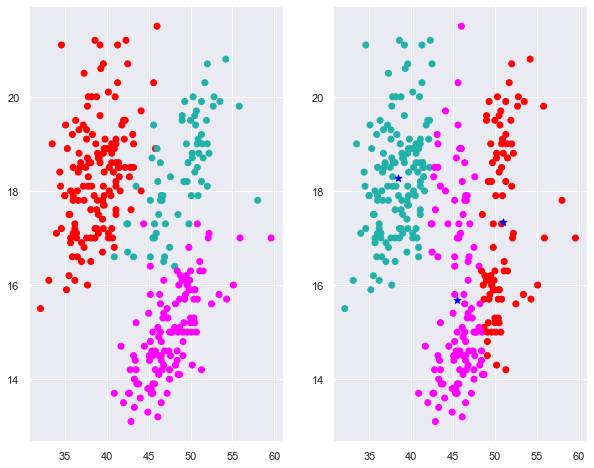

In [61]:
kmeans1 = KMeans(n_clusters=3, max_iter= 5000, random_state=0)

kmeans1.fit(X)
sklabels = kmeans1.labels_
current_colors = [colors(label) for label in sklabels]
centers = kmeans1.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 8))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

ax2.scatter([centers[0,0]],[centers[0,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[1,0]],[centers[1,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[2,0]],[centers[2,1]], color = "blue", marker = '*', s =50)
plt.show()

From the result above, we can see that even the iteration is bigger, the result is still not good. Next jupyter, we attemp to
use the PCA and the four features to do the cluster to see if it can help.